In [1]:
# High Voltage Breakdown Plotter
# By: Logan Norman
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import pandas as pd
from dataprocesser import processdat,processdatE

In [2]:
# Use this code to input a new entry into the data file

# d = {'Gas': 'Ar',
#      'Gap_Distance': '1mm',
#      'Pressure_Range': 'AP',
#      'Getter?':'yes',
#      'Vacuum(mbar)':2.5e-6,
#      'p':[[1,2,3,4,5,6,7,8,9,10]], 
#      'v':[[[1.9,1.9,1.9],[2.4,2.4,2.4],[3.2,3.0,3.0],[3.4,3.5,3.4],[3.8,3.3,3.8],[4.1,4.1,4.2],[4.4,4.4,4.4],[4.7,4.7,4.8],[5.1,5.1,5.2],[5.4,5.5,5.4]]]}

# dfa = pd.DataFrame(data=d)

# df2 = pd.read_hdf('HVBreakdowndata.h5')

# df = df2.append(dfa)

# df.to_hdf('HVBreakdowndata.h5', key = 'df', mode='w')

# df2

In [3]:
df = pd.read_hdf('HVBreakdowndata.h5')

df

,Gas,Gap_Distance,Pressure_Range,Run,Getter?,Vacuum(mbar),p,v
0,Ar,0.1mm,AP,1,yes,0.000002,"[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]","[[0.18, 0.22, 0.18, 0.18, 0.2, 0.2, 0.22, 0.22..."
1,Ar,0.1mm,GP,1,yes,0.000003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.5, 0.6, 0.6], [0.7, 0.7, 0.7], [0.7, 0.7, ..."
2,Ar,10mm,GP,1,no,0.000030,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[11.5, 11.3, 11.3], [15.5, 15.7, 15.7], [19.5..."
3,Ar,1mm,AP,1,yes,0.000004,"[0.12, 0.2, 0.3, 0.4, 0.5, 0.6, 0.71, 0.84, 0....","[[0.4, 0.4, 0.3], [0.5, 0.3, 0.5], [0.6, 0.5, ..."
4,Ar,1mm,GP,1,no,0.000001,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[1.9, 1.9, 1.9], [2.6, 2.5, 2.5], [3.1, 3.1, ..."
5,Ar,1mm,GP,2,yes,0.000009,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[2.6, 2.7, 2.6], [3.5, 3.4, 3.5], [4, 4, 4], ..."
6,Ar,1mm,GP,3,yes,0.000003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[1.9, 1.9, 1.9], [2.4, 2.4, 2.4], [3.2, 3.0, ..."
7,Ar,5mm,GP,1,no,0.000003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[8.2, 8.2, 8.3], [10.6, 10.5, 10.5], [13.1, 1..."
8,Ar,5mm,GP,2,no,0.000001,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[6.9, 6.9, 6.9], [9.6, 9.6, 9.5], [12.1, 12, ..."
9,ArCH4,10mm,GP,1,no,0.000006,"[1, 2, 3, 4, 5]","[[24, 20, 20], [27.5, 27.5, 26.5], [33.5, 33.5..."


In [4]:
#This code is used to send the unprocessed data through the averaging and error generating program and produce a processed data file

# df2 = df

# df3 = pd.DataFrame()

# for index in df2.index:
    
#     x1,x2,x3,x4,x5 = processdat(df2.loc[index,'p'],df2.loc[index,'v'],df2.loc[index,'Gap_Distance'],df2.loc[index,'Pressure_Range'])
#     d2 = {'avev': [x1],'verr': [x2],'avep': [x3],'perr': [x4],'trend': [x5]}
#     dfa = pd.DataFrame(data=d2)
    
#     df3 = df3.append(dfa, ignore_index = True)

# df2['avev'] = df3['avev']
# df2['verr'] = df3['verr']
# df2['avep'] = df3['avep']
# df2['perr'] = df3['perr']
# df2['trend'] = df3['trend']

# df2.to_hdf('processedHVdata.h5', key='df', mode='w')


In [15]:
dfp = pd.read_hdf('processedHVdata.h5')

dfp = dfp.set_index(['Gas', 'Gap_Distance', 'Pressure_Range', 'Run']).sort_index()

dfp

print(dfp.loc[('ArCO2','1mm','GP','1'), 'avep'])

[152.0, 228.00000000000003, 304.0, 380.0, 456.00000000000006, 532.0, 608.0, 684.0, 760.0, 836.0000000000001]


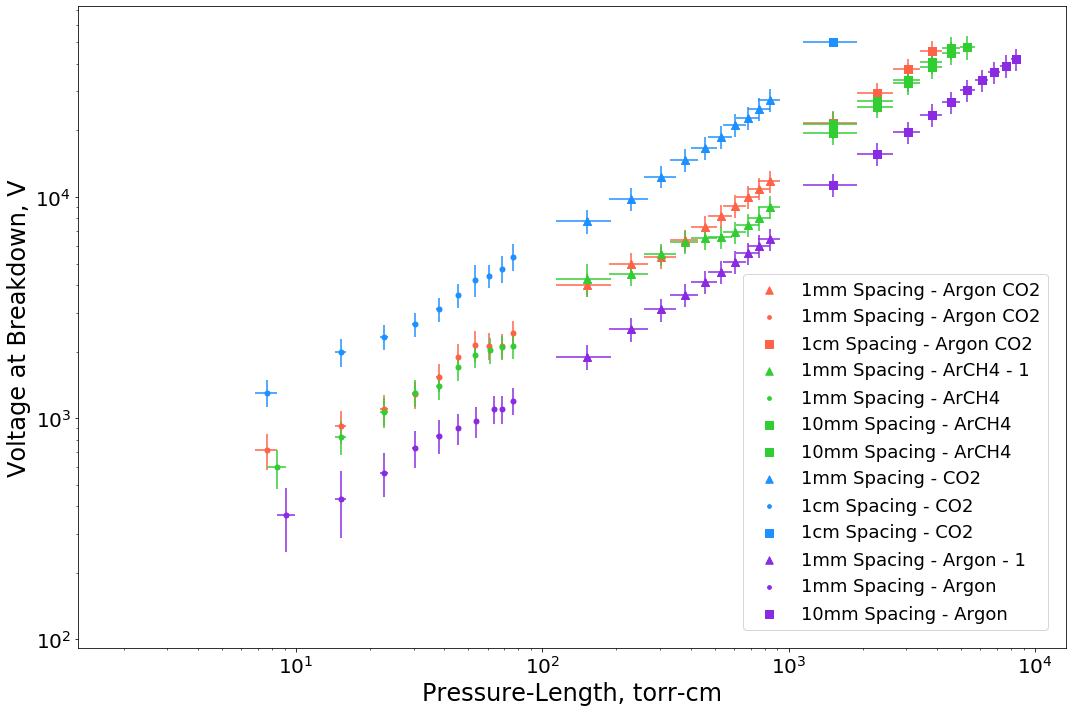

In [34]:
fig, ax = plt.subplots()

# Argon CO2
plt.errorbar(dfp.loc[('ArCO2','1mm','GP','1'), 'avep'],dfp.loc[('ArCO2','1mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','1mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','1mm','GP','1'), 'verr'], ls='', color='tomato', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCO2','1mm','GP','1'), 'avep'],dfp.loc[('ArCO2','1mm','GP','1'), 'avev'],color='tomato', marker='^', s=56, label='1mm Spacing - Argon CO2')
plt.errorbar(dfp.loc[('ArCO2','1mm','AP','1'), 'avep'],dfp.loc[('ArCO2','1mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCO2','1mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCO2','1mm','AP','1'), 'verr'], ls='', color='tomato', marker='.', ms=10)
plt.scatter(dfp.loc[('ArCO2','1mm','AP','1'), 'avep'],dfp.loc[('ArCO2','1mm','AP','1'), 'avev'],color='tomato', marker='.', s=56, label='1mm Spacing - Argon CO2')
plt.errorbar(dfp.loc[('ArCO2','10mm','GP','1'), 'avep'],dfp.loc[('ArCO2','10mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','10mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','10mm','GP','1'), 'verr'], ls='', color='tomato', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCO2','10mm','GP','1'), 'avep'],dfp.loc[('ArCO2','10mm','GP','1'), 'avev'],color='tomato', marker='s', s=56, label='1cm Spacing - Argon CO2')
# plt.errorbar(dfp.loc[('ArCO2','5mm','GP','1'), 'avep'],dfp.loc[('ArCO2','5mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','5mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','5mm','GP','1'), 'verr'], ls='', color='tomato', marker='X', ms=10)
# plt.scatter(dfp.loc[('ArCO2','5mm','GP','1'), 'avep'],dfp.loc[('ArCO2','5mm','GP','1'), 'avev'],color='tomato', marker='X', s=56, label='5mm Spacing - Argon CO2')

# Argon CH4
plt.errorbar(dfp.loc[('ArCH4','1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','1mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','1'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCH4','1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','1mm','GP','1'), 'avev'],color='limegreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 1')
# plt.errorbar(dfp.loc[('ArCH4','1mm','GP','2'), 'avep'],dfp.loc[('ArCH4','1mm','GP','2'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','2'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','2'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
# plt.scatter(dfp.loc[('ArCH4','1mm','GP','2'), 'avep'],dfp.loc[('ArCH4','1mm','GP','2'), 'avev'],color='limegreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 2')
# plt.errorbar(dfp.loc[('ArCH4','1mm','GP','3'), 'avep'],dfp.loc[('ArCH4','1mm','GP','3'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','3'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','3'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
# plt.scatter(dfp.loc[('ArCH4','1mm','GP','3'), 'avep'],dfp.loc[('ArCH4','1mm','GP','3'), 'avev'],color='limegreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 3')
plt.errorbar(dfp.loc[('ArCH4','1mm','AP','1'), 'avep'],dfp.loc[('ArCH4','1mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','AP','1'), 'verr'], ls='', color='limegreen', marker='.', ms=10)
plt.scatter(dfp.loc[('ArCH4','1mm','AP','1'), 'avep'],dfp.loc[('ArCH4','1mm','AP','1'), 'avev'],color='limegreen', marker='.', s=56, label='1mm Spacing - ArCH4')
plt.errorbar(dfp.loc[('ArCH4','10mm','GP','1'), 'avep'],dfp.loc[('ArCH4','10mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','GP','1'), 'verr'], ls='', color='limegreen', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCH4','10mm','GP','1'), 'avep'],dfp.loc[('ArCH4','10mm','GP','1'), 'avev'],color='limegreen', marker='s', s=56, label='10mm Spacing - ArCH4')
plt.errorbar(dfp.loc[('ArCH4','10mm','GP','2'), 'avep'],dfp.loc[('ArCH4','10mm','GP','2'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','GP','2'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','GP','2'), 'verr'], ls='', color='limegreen', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCH4','10mm','GP','2'), 'avep'],dfp.loc[('ArCH4','10mm','GP','2'), 'avev'],color='limegreen', marker='s', s=56, label='10mm Spacing - ArCH4')
# plt.errorbar(dfp.loc[('ArCH4','5mm','GP','1'), 'avep'],dfp.loc[('ArCH4','5mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','5mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','5mm','GP','1'), 'verr'], ls='', color='limegreen', marker='X', ms=8)
# plt.scatter(dfp.loc[('ArCH4','5mm','GP','1'), 'avep'],dfp.loc[('ArCH4','5mm','GP','1'), 'avev'],color='limegreen', marker='X', s=56, label='10mm Spacing - ArCH4')

# CO2
plt.errorbar(dfp.loc[('CO2','1mm','GP','1'),'avep'],dfp.loc[('CO2','1mm','GP','1'),'avev'], xerr=dfp.loc[('CO2','1mm','GP','1'),'perr'], yerr=dfp.loc[('CO2','1mm','GP','1'),'verr'], ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(dfp.loc[('CO2','1mm','GP','1'),'avep'],dfp.loc[('CO2','1mm','GP','1'),'avev'],color='dodgerblue', marker='^', s=56, label='1mm Spacing - CO2')
plt.errorbar(dfp.loc[('CO2','1mm','AP','1'),'avep'],dfp.loc[('CO2','1mm','AP','1'),'avev'], xerr=dfp.loc[('CO2','1mm','AP','1'),'perr'], yerr=dfp.loc[('CO2','1mm','AP','1'),'verr'], ls='', color='dodgerblue', marker='.', ms=10)
plt.scatter(dfp.loc[('CO2','1mm','AP','1'),'avep'],dfp.loc[('CO2','1mm','AP','1'),'avev'],color='dodgerblue', marker='.', s=56, label='1cm Spacing - CO2')
plt.errorbar(dfp.loc[('CO2','10mm','GP','1'),'avep'],dfp.loc[('CO2','10mm','GP','1'),'avev'], xerr=dfp.loc[('CO2','10mm','GP','1'),'perr'], yerr=dfp.loc[('CO2','10mm','GP','1'),'perr'], ls='', color='dodgerblue', marker='s', ms=8)
plt.scatter(dfp.loc[('CO2','10mm','GP','1'),'avep'],dfp.loc[('CO2','10mm','GP','1'),'avev'],color='dodgerblue', marker='s', s=56, label='1cm Spacing - CO2')

# Argon
plt.errorbar(dfp.loc[('Ar','1mm','GP','1'),'avep'],dfp.loc[('Ar','1mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','1'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(dfp.loc[('Ar','1mm','GP','1'),'avep'],dfp.loc[('Ar','1mm','GP','1'),'avev'],color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon - 1')
# plt.errorbar(dfp.loc[('Ar','1mm','GP','2'),'avep'],dfp.loc[('Ar','1mm','GP','2'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','2'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','2'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
# plt.scatter(dfp.loc[('Ar','1mm','GP','2'),'avep'],dfp.loc[('Ar','1mm','GP','2'),'avev'],color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon - 2')
# plt.errorbar(dfp.loc[('Ar','1mm','GP','3'),'avep'],dfp.loc[('Ar','1mm','GP','3'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','3'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','3'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
# plt.scatter(dfp.loc[('Ar','1mm','GP','3'),'avep'],dfp.loc[('Ar','1mm','GP','3'),'avev'],color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon - 3')
plt.errorbar(dfp.loc[('Ar','1mm','AP','1'),'avep'],dfp.loc[('Ar','1mm','AP','1'),'avev'], xerr=dfp.loc[('Ar','1mm','AP','1'),'perr'], yerr=dfp.loc[('Ar','1mm','AP','1'),'verr'], ls='', color='blueviolet', marker='.', ms=10)
plt.scatter(dfp.loc[('Ar','1mm','AP','1'),'avep'],dfp.loc[('Ar','1mm','AP','1'),'avev'],color='blueviolet', marker='.', s=56, label='1mm Spacing - Argon')
plt.errorbar(dfp.loc[('Ar','10mm','GP','1'),'avep'],dfp.loc[('Ar','10mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','10mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','10mm','GP','1'),'verr'], ls='', color='blueviolet', marker='s', ms=8)
plt.scatter(dfp.loc[('Ar','10mm','GP','1'),'avep'],dfp.loc[('Ar','10mm','GP','1'),'avev'],color='blueviolet', marker='s', s=56, label='10mm Spacing - Argon')
# plt.errorbar(dfp.loc[('Ar','5mm','GP','1'),'avep'],dfp.loc[('Ar','5mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','5mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','5mm','GP','1'),'verr'], ls='', color='blueviolet', marker='X', ms=10)
# plt.scatter(dfp.loc[('Ar','5mm','GP','1'),'avep'],dfp.loc[('Ar','5mm','GP','1'),'avev'],color='blueviolet', marker='X', s=56, label='5mm Spacing - Argon')

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

# ax.set_xlim([1e-2,30])

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.grid()

plt.tight_layout()
# plt.savefig('logplot.png', dpi=400)

# plt.scatter(p*d, Vb)

plt.show()


In [103]:
p = np.arange(.4, 1e4, .01)
d = 1
gammase = .01
# Aco = 12
# Bco = 203
Aco = 12
Bco = 180
Cco = 946.205
k=.86
# k=.78

Vb = 1*p*Bco/(np.log(Aco*p*1/np.log(1+1/gammase))) #OG Paschen Curve

Vb2 = 1*p*Bco/(np.log(Aco*p*1/np.log(10^8))) #Meek Criterion Paschen Curve

# Vb3 = 1*p**k*Bco/(np.log(1*p*Aco/np.log(1+1/gammase)-p*Aco/Cco)) #Modified Paschen Formula



In [104]:
pd_10mil = np.array([75.819,  66.675,  56.9595, 47.625,  37.9095, 27.813,  19.05,   17.3355, 15.24,
 13.335,  11.43,    9.525,   7.62,    5.5245,  3.2385])
v_10mil = np.array([1033.33333333,  951.66666667,  856.66666667,  780.,          691.66666667,
  570.,          450.,          426.33333333,  397.33333333,  371.66666667,
  344.33333333,  316.33333333,  285.66666667,  257.33333333,  221.66666667])
pd10mil_err = np.array([7.58429284, 6.67022087, 5.69913473, 4.76630848, 3.79573341, 2.78781634,
 1.91450131, 1.74398562, 1.5358601,  1.34703842, 1.15876626, 0.97136322,
 0.78545162, 0.58437253, 0.37572473])
v10mil_err = np.array([47.14045208, 18.40893503,  4.71404521,  4.0824829,   6.23609564,  4.0824829,
  0.,          2.62466929,  1.88561808,  2.3570226,   0.47140452,  1.24721913,
  3.09120617,  1.88561808,  1.24721913])

lep = np.arange(1, 10.5, .5)
ledat = np.array([[3.5,3.3,3.3,3.3],[4,3.8,3.8,3.9],[4.5,4.4,4.4,4.4],[4.8,5,4.9,5],[5.5,5.5,5.6,5.5],[6,6.1,6.1,6.1],[6.6,6.6,6.6,6.6],[7,7.1,7,7],[7.5,7.5,7.5,7.4],[8,8,7.9,7.9],[8.4,8.3,8.3,8.3],[8.6,8.7,8.6,8.7],[9,9,9.1,9],[9.4,9.3,9.4,9.3],[9.6,9.6,9.6,9.6],[9.9,9.9,10,9.9],[10.2,10.3,10.2,10.3],[10.5,10.5,10.5,10.5],[10.9,10.8,10.9,10.8]])
ledatm = []

for i in range(len(ledat)):
    ledatm.append(np.mean(ledat[i], axis = 0)*1000)

leerr = np.array([.0353,.0359,.024,.027,.0345,.04,.0442,.03553,.0519,.0456,.0536,.0552,.046,.0365,.0467,.0553,.0525,.0648,.0476])

print(leerr)
print(len(ledatm))
print(len(lep))

[0.0353  0.0359  0.024   0.027   0.0345  0.04    0.0442  0.03553 0.0519
 0.0456  0.0536  0.0552  0.046   0.0365  0.0467  0.0553  0.0525  0.0648
 0.0476 ]
19
19


NameError: name 'x6a' is not defined

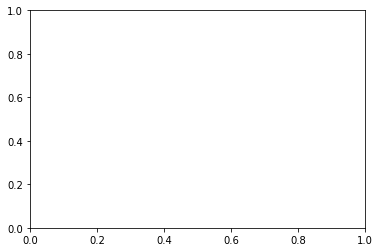

In [107]:
fig, ax = plt.subplots()
plt.errorbar(x6a, y6a, xerr=xerr6, yerr=yerr6, ls='', color='tomato', marker='^', ms=8)
plt.scatter(x6a, y6a,color='tomato', marker='^', s=56, label='1mm Spacing ')
plt.errorbar(x9a, y9a, xerr=xerr9, yerr=yerr9, ls='', color='tomato', marker='s', ms=8)
plt.scatter(x9a, y9a,color='tomato', marker='s', s=56, label='1cm Spacing')
plt.errorbar(x12a, y12a, xerr=xerr12, yerr=yerr12, ls='', color='tomato', marker='X', ms=8)
plt.scatter(x12a, y12a,color='tomato', marker='X', s=56, label='5mm Spacing - (1 to 10)')
plt.errorbar(x13a,y13a, xerr=xerr13, yerr=yerr13, ls='', color='blueviolet', marker='X', ms=8)
plt.scatter(x13a,y13a,  color='blueviolet', marker='X', s=56, label='5mm Spacing - (10 to 1)')
plt.errorbar(x14a,y14a, xerr=xerr14, yerr=yerr14, ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(x14a,y14a,  color='blueviolet', marker='^', s=56, label='1mm Spacing - (Test 2)')
plt.errorbar(x15a,y15a, xerr=xerr15, yerr=yerr15, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(x15a,y15a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing')
plt.errorbar(x16a,y16a, xerr=xerr16, yerr=yerr16, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(x16a,y16a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing - (Test 3)')
plt.errorbar(x17a,y17a, xerr=xerr17, yerr=yerr17, ls='', color='blueviolet', marker='.', ms=8)
plt.scatter(x17a,y17a,  color='blueviolet', marker='.', s=56, label='0.1mm Spacing')
plt.errorbar(x18a,y18a, xerr=xerr18, yerr=yerr18, ls='', color='blueviolet', marker='.', ms=8)
plt.scatter(x18a,y18a,  color='blueviolet', marker='.', s=56, label='0.1mm Spacing')

# plt.errorbar(pd_10mil,v_10mil, xerr=pd10mil_err, yerr=v10mil_err, ls='', marker='o', color='r')
# plt.errorbar(pd_10mil,v_10mil, ls='', marker='o', color='r', label='Katherine\'s Data')
# plt.errorbar(lep*.52*760,ledatm, xerr=.125*760, yerr=leerr*1000, ls='', marker='o', color='b')
# plt.errorbar(lep*.52*760,ledatm, ls='', marker='o', color='b', label='Leslie\'s Data')

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot(p, Vb, label='Original Paschen Curve Formula')

# plt.plot(p, Vb2, label='Meek Criterion Formula')

# plt.plot(p, Vb3, label='Modified Formula')


plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="upper left")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# ax.set_ylim([30,1e6])
# ax.set_xlim([1e-1,1e4])
# pltplt.ylim(.grid())
plt.tight_layout()

# plt.savefig('Arlogplot5.png',dpi=400)

plt.show()

NameError: name 'p6a' is not defined

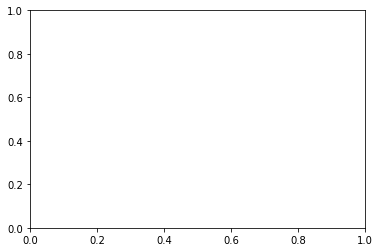

In [106]:
fig, ax = plt.subplots()
plt.errorbar(p6a, E6a, xerr=xerr6, yerr=yerr6, ls='', color='tomato', marker='^', ms=8)
plt.scatter(p6a, E6a,color='tomato', marker='^', s=56, label='1mm Spacing - Argon')
plt.errorbar(p9a, E9a, xerr=xerr9, yerr=yerr9, ls='', color='tomato', marker='s', ms=8)
plt.scatter(p9a, E9a,color='tomato', marker='s', s=56, label='1cm Spacing - Argon')
plt.errorbar(p12a, E12a, xerr=xerr12, yerr=yerr12, ls='', color='tomato', marker='X', ms=8)
plt.scatter(p12a, E12a,color='tomato', marker='X', s=56, label='5mm Spacing - Argon (1 to 10)')
plt.errorbar(p13a,E13a, xerr=xerr13, yerr=yerr13, ls='', color='blueviolet', marker='X', ms=8)
plt.scatter(p13a,E13a,  color='blueviolet', marker='X', s=56, label='5mm Spacing - Argon (10 to 1)')
plt.errorbar(p14a,E14a, xerr=xerr14, yerr=yerr14, ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(p14a,E14a,  color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon (Test 2)')
plt.errorbar(p15a,E15a, xerr=xerr15, yerr=yerr15, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(p15a,E15a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing - Argon')
plt.errorbar(p16a,E16a, xerr=xerr16, yerr=yerr16, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(p16a,E16a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing - Argon (Test 3)')


# plt.errorbar(pd_10mil,v_10mil, xerr=pd10mil_err, yerr=v10mil_err, ls='', marker='o', color='r')
# plt.errorbar(pd_10mil,v_10mil, ls='', marker='o', color='r', label='Katherine\'s Data')
# plt.errorbar(lep*.52*760,ledatm, xerr=.125*760, yerr=leerr*1000, ls='', marker='o', color='b')
# plt.errorbar(lep*.52*760,ledatm, ls='', marker='o', color='b', label='Leslie\'s Data')

# ax.set_yscale('log')
# ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot(p, Vb, label='Original Paschen Curve Formula')

# plt.plot(p, Vb2, label='Meek Criterion Formula')
 
# plt.plot(p, Vb3, label='Modified Formula')


plt.xlabel('Pressure, torr', fontsize=18)
plt.ylabel('Electric Field at Breakdown, V/cm', fontsize=18)
plt.legend(fontsize=18, borderaxespad=1, loc="upper left")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# ax.set_ylim([10,1e5])
# ax.set_xlim([1e-1,5e4])
# pltplt.ylim(.grid())
plt.tight_layout()

plt.show()

D:\work\HVBreakdown\dataprocesser.py:46: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, ya, 1)


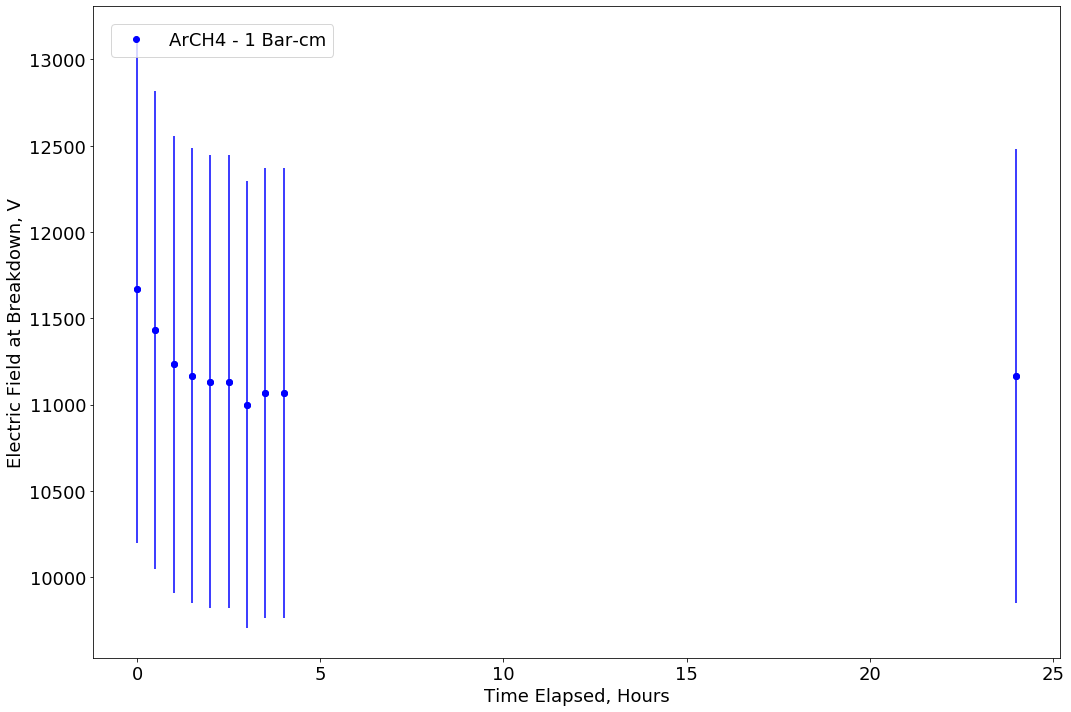

In [10]:
#Time Dependance Study
fig, ax = plt.subplots()
pt=[1,1,1,1,1,1,1,1,1,1] #bar

t = [0,.5,1,1.5,2,2.5,3,3.5,4,24] #hours

vt=[[12.4,11.4,11.2],[11.9,11.2,11.2],[11.2,11.3,11.2],[11.3,11.1,11.1],[11.1,11.2,11.1],[11.2,11.1,11.1],[11.0,11.0,11.0],[11.1,11.0,11.1],[11.1,11.0,11.1],[11.2,11.2,11.1]] #kiloVolts

vtave,vterr,ptave,pterr,trend = processdat(pt,vt,'10mm','GP')

plt.errorbar(t,vtave, xerr=None, yerr=vterr, ls='', marker='o', color='b')
plt.errorbar(t,vtave, ls='', marker='o', color='b', label='ArCH4 - 1 Bar-cm')

fig.set_figheight(10)
fig.set_figwidth(15)

plt.xlabel('Time Elapsed, Hours', fontsize=18)
plt.ylabel('Electric Field at Breakdown, V', fontsize=18)
plt.legend(fontsize=18, borderaxespad=1, loc="upper left")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

plt.show()